In [28]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
import statsmodels.api as sm
import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [31]:
allmales={}
allfemales={}
fnamedict = {'all' : 1, 'white' : 4, 'black' : 6, 
             'asian' : 8, 'hispanic' : 9,
             'f' : (allfemales, 3), 'm' : (allmales, 2)}

for k in ['f', 'm']:
    for race in fnamedict:
        if not race == 'f' and not race == 'm':
            print (race)
            fnamedict[k][0][race] = pd.read_excel(url + 
                                        '/pinc08_%d'%fnamedict[k][1] + 
                                        '_1_%d'%fnamedict[race] + 
                                        '.xls', 
                                        header=(9))
        
allfemales.keys(), allmales.keys()
col = {'all': 'IndianRed', 'hispanic': 'SteelBlue', 'black': 'blue', 
      'white': 'DarkOrange', 'asian': 'olive'}

hispanic
black
asian
all
white
hispanic
black
asian
all
white


In [32]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


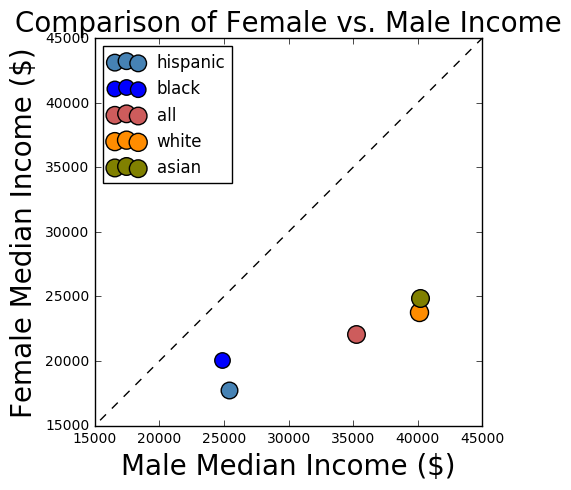

In [56]:
all_m = np.zeros(len(allmales) + 1)
all_f = np.zeros(len(allmales) + 1)
    
pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=100*allmales[k]['Median income'][1] / \
                allfemales[k]['Median income'][1],
                c=col[k], label=k)
    all_m[i] = allmales[k]['Median income'][1]
    all_f[i] = allfemales[k]['Median income'][1]
pl.plot([0, 45000], [0, 45000],'k--')
pl.title('Comparison of Female vs. Male Income', fontsize=20)
pl.xlim(15000,45000)
pl.ylim(15000,45000)
pl.xlabel('Male Median Income ($)', fontsize=20)
pl.ylabel('Female Median Income ($)', fontsize=20)
pl.legend(loc='upper left')

# Figure 1.  This is a comparison of female to male median income, based on the 2014 Annual Social and Economic Supplement from the U.S. Census Bureau.  The data points represent the female-male income pair for each demographic (All, Asian, Black, Hispanic, White).  The dotted line represents the  "Income Equality Line," at which females and males earn the same income.  Based off of this line, we can see that female income is significantly below male income across the demographic spectrum.